### Import Necessary Libraries

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import pandas as pd

### Import/load Data

In [3]:
wine_data = load_wine()

In [5]:
wine_df = pd.DataFrame(data=wine_data.data,columns=wine_data.feature_names)
wine_df['Target'] = wine_data.target

In [6]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Data Understanding

In [8]:
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [9]:
wine_df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Target                          0
dtype: int64

In [14]:
wine_df.shape

(178, 14)

In [10]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### Model Building | Data Preprocessing

In [21]:
X = wine_df.drop('Target',axis=1)
y = wine_df['Target']

In [22]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.20,random_state=12)

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=3)

### Model Training | Model Evaluation

In [25]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
y_pred = knn_model.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred)

0.9722222222222222

In [28]:
X_train_unscaled,X_test_unscaled,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12)

In [36]:
knn_model_unscaled = KNeighborsClassifier(n_neighbors=3)
knn_model_unscaled.fit(X_train_unscaled,y_train)
y_pred_unscaled = knn_model_unscaled.predict(X_test_unscaled)
accuracy_score(y_test,y_pred_unscaled)

0.6944444444444444

In [37]:
knn_model_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_model_unscaled.fit(X_train_unscaled,y_train)
y_pred_unscaled = knn_model_unscaled.predict(X_test_unscaled)
accuracy_score(y_test,y_pred_unscaled)

0.7222222222222222

In [38]:
knn_model_unscaled = KNeighborsClassifier(n_neighbors=7)
knn_model_unscaled.fit(X_train_unscaled,y_train)
y_pred_unscaled = knn_model_unscaled.predict(X_test_unscaled)
accuracy_score(y_test,y_pred_unscaled)

0.6944444444444444

### Finding Best K Value

In [51]:
neighbours = list(range(1,51))
cv_scores = []

for i in neighbours:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    cv_score = cross_val_score(estimator=knn_model,X=X_train_unscaled,y=y_train)
    cv_scores.append(cv_score.mean())

In [52]:
cv_scores.index(max(cv_scores))+1

1

In [53]:
from matplotlib import pyplot as plt

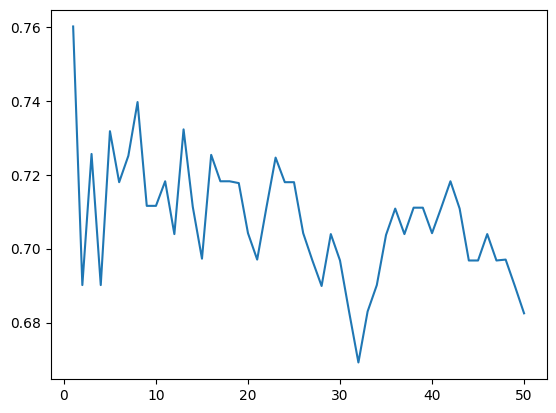

In [54]:
plt.plot(neighbours,cv_scores)

In [55]:
knn_final_model = KNeighborsClassifier(n_neighbors=1)

In [56]:
knn_final_model.fit(X_train_unscaled,y_train)

KNeighborsClassifier(n_neighbors=1)

In [58]:
y_pred_final = knn_final_model.predict(X_test_unscaled)

In [59]:
accuracy_score(y_test,y_pred_final)

0.7777777777777778